In [29]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [30]:
import matplotlib.pyplot as plt

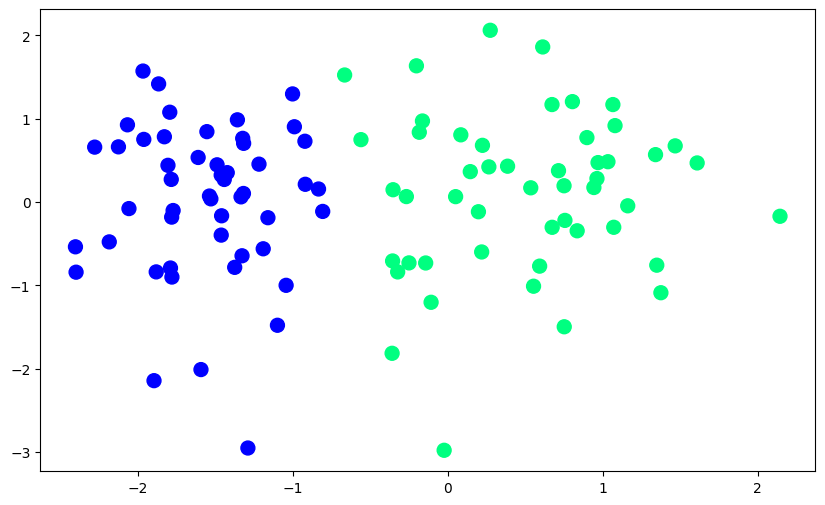

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [32]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat= step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [33]:
def step(z):
    return 1 if z>0 else 0 


In [34]:
intercept_, coef_ = perceptron(X, y)

print(coef_)
print(intercept_)

[1.26399811 0.19839611]
1.0


In [35]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [36]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b 

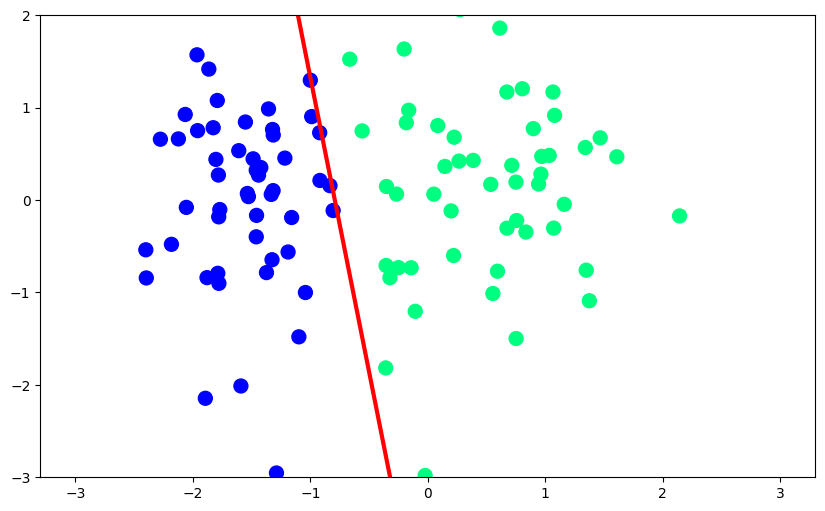

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()


In [44]:
def perceptron(X, y):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis=1)  # Adding bias term
    weights = np.ones(X.shape[1])  # Initializing weights
    lr = 0.1  # Learning rate
    
    for _ in range(200):  # Using '_' as the loop variable since it's not used inside the loop
        j = np.random.randint(0, 100)  # Randomly selecting a data point index
        y_hat = step(np.dot(X[j], weights))  # Predicting the output
        
        # Updating weights
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
        # Calculating slope and intercept
        m.append(-(weights[1] / weights[2]))
        b.append(-(weights[0] / weights[2]))
    
    return m, b

In [45]:
 m, b = perceptron(X, y)

In [48]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


<IPython.core.display.Javascript object>


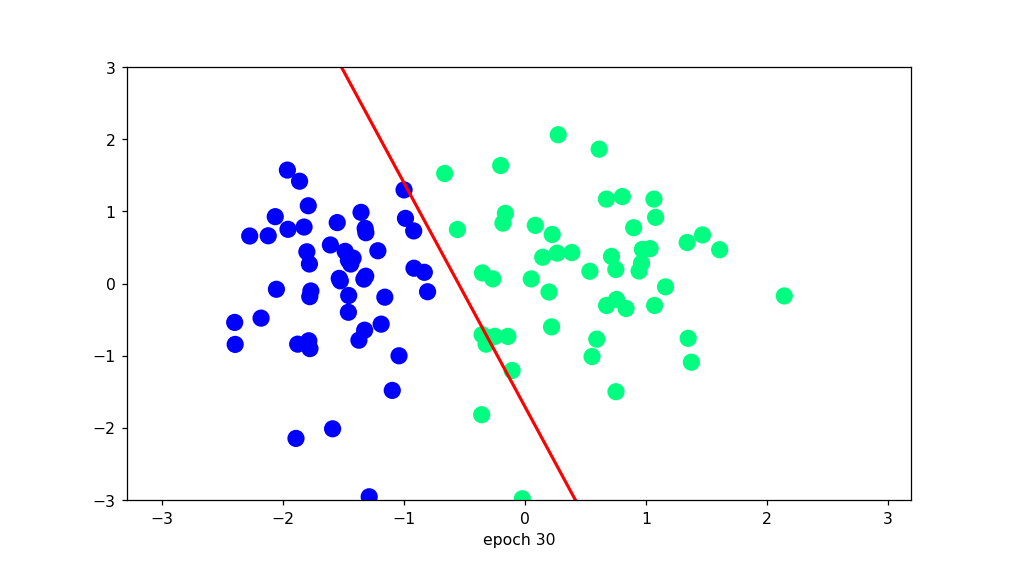

In [50]:
fig, ax = plt.subplots(figsize=(9, 5))  # Added '=' between ax and plt.subplots

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * m[0] + b[0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, x_i * m[0] + b[0], 'r', linewidth=2)  # Added comma after line

plt.ylim(-3, 3)

def update(i):
    label = 'epoch {0}'.format(i + 1)  # Added '=' sign for assignment
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(label)
      # Return line and ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)  # Added '=' between anim and FuncAnimation

